In [1]:
import numpy as np
import pathlib
cwd = pathlib.Path.cwd()
import pandas
import itertools
import os
import matplotlib.pyplot as plt
from PIL import Image


# exon_images = cwd / "FractalImageEvI" / "EXON"
# intron_images = cwd / "FractalImageEvI" / "INTRON"
# # utr5_images = cwd / "FractalImage" / "UTR5"
# # utr3_images = cwd / "FractalImage" / "UTR3"
# # exon_images = cwd / "FractalImage" / "Exon"

# exon_images.mkdir(parents = True, exist_ok = True)
# intron_images.mkdir(parents = True, exist_ok = True)
# # utr5_images.mkdir(parents = True, exist_ok = True)
# # utr3_images.mkdir(parents = True, exist_ok = True)
# # exon_images.mkdir(parents = True, exist_ok = True)

In [2]:
def manhattan_position(nuc: int, x0: int):
    '''
    '''
    x1: np.array = (nuc - x0) / 2

    return x1.astype(int)


def nucleotide_permutations(sequence: str = "ACGT", length: int = 3) -> dict:
    nuc_perm = dict()

    if len(sequence) < length:
        return None

    perms = itertools.permutations(sequence, length)
    for p in perms:

        key = ""
        for n in p:
            key = f"{key}{n}"

        nuc_perm[key] = 0

    return nuc_perm


def nucleotide_counter(sequence: str, window_size: int):
    '''
    '''
    keys: set = set()
    counter = dict()
    master_count = 0


    for i in range(len(sequence) - window_size):
        seq = sequence[i: i + window_size]

        if seq not in keys:
            keys.add(seq)
            counter[seq] = 1
            master_count += 1

        else:
            counter[seq] += 1
            master_count += 1

    for key, value in counter.items():
        counter[key] = value / master_count

    return counter

    



def chaos_game_representation(probabilities: dict, k):
    array_size = int(np.sqrt(4**k))

    cgr = np.zeros(shape = (array_size, array_size))

    for key, value in probabilities.items():
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
 
        for char in key:
            if char == "T":
                posx += maxx / 2
            elif char == "C":
                posy += maxy / 2
            elif char == "G":
                posx += maxx / 2
                posy += maxy / 2
            maxx /=  2
            maxy /= 2

        # print(int(posy), int(posx))
        cgr[int(posy - 1)][int(posx - 1)] = value


    return cgr


def gif_generator(path: str, filename: str):
    '''
    '''
    png_files = list(path.rglob("*.png"))
    png_files.sort(key = lambda x: os.path.getmtime(x))

    frames = []
    for png in png_files:
        new_frame = Image.open(png)
        # print(png)
        frames.append(new_frame)


    frames[0].save(filename, format="GIF", append_images=frames[1:], save_all = True, loop = 0, duration = 225) 


In [53]:
with open(cwd / "Seqs_IL12RB2.txt", "r") as seqfile:
    seqs = seqfile.readlines()

# print(len(seqs))
# print(seqs[2])
# print(seqs[4])

full_seq = seqs[0]
exon_seq = seqs[2]
intron_seq = seqs[4]

kmer = 9

In [54]:
# train_data: pandas.DataFrame = pandas.read_pickle(cwd / "TrainingGeneData_v5.pkl")
# # print(train_data.shape)

# keep = np.where(train_data["Seq"].str.len() >= 100)[0]
# # print(keep)
# train_data = train_data.iloc[keep, :]

# rows, cols = train_data.shape

# train_data = train_data.reset_index()

# # print(train_data["Type"].unique())

# # print(train_data.shape)
# # print(train_data)

# print(train_data)

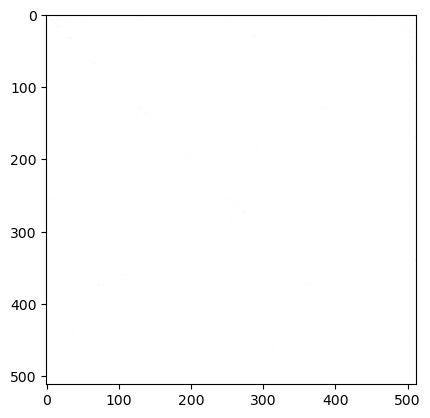

In [55]:

full_mer = nucleotide_counter(full_seq, kmer)
full_cgr = chaos_game_representation(full_mer, kmer)
plt.imshow(full_cgr, cmap = "gray_r")
plt.imsave(cwd / f"Full_Inverted_{kmer}.png", full_cgr, cmap = "gray_r")

# plt.imshow(full_cgr)


# exon = 0
# intron, intname = 0, "Intron"
# cds, exname = 0, "Exon"
# # utr3, ut3name = 0, "UTR3"
# # utr5, ut5name = 0, "UTR5"

# for row in range(rows):
#     seq = train_data.loc[row, "Seq"]
#     typ = train_data.loc[row, "Type"]

#     mer = nucleotide_counter(seq, kmer)
#     cgr = chaos_game_representation(mer, kmer)

#     # print(cgr)
#     # print(np.max(cgr), np.min(cgr))

#     plt.imshow(cgr, cmap = "gray")

#     if typ in intname:
#         filepath = intron_images / f"Intron_{intron}.png"
#         plt.imsave(filepath, cgr, cmap = "gray")
#         intron += 1

#     elif typ in exname:

#         filepath = exon_images / f"Exon_{exon}.png"
#         plt.imsave(filepath, cgr, cmap = "gray")

#         exon += 1


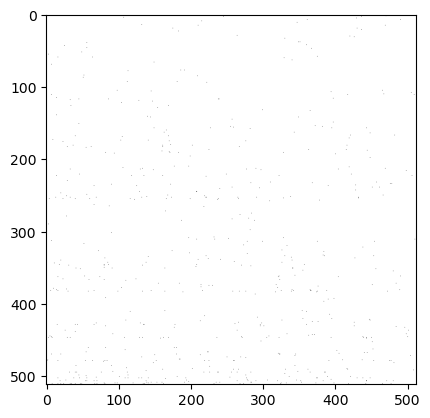

In [56]:
exon_mer = nucleotide_counter(exon_seq, kmer)
exon_cgr = chaos_game_representation(exon_mer, kmer)
plt.imshow(exon_cgr, cmap = "gray_r")
plt.imsave(cwd / f"Exon_Inverted_{kmer}.png", exon_cgr, cmap = "gray_r")
# plt.imshow(exon_cgr)



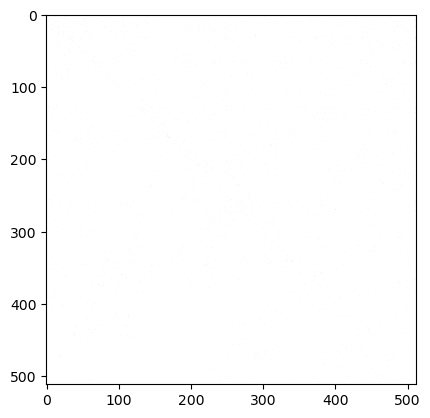

In [57]:
intron_mer = nucleotide_counter(intron_seq, kmer)
intron_cgr = chaos_game_representation(intron_mer, kmer)
plt.imshow(intron_cgr, cmap = "gray_r")
# plt.imshow(intron_cgr)
# plt.imsave(cwd / "Gray_Test.png", intron_cgr, cmap = "gray")
plt.imsave(cwd / f"Intron_Inverted_{kmer}.png", intron_cgr, cmap = "gray_r")
